# Artificial Neural Networks (ANNs)

## Neuron

<img src="https://cdn.prod.website-files.com/614c82ed388d53640613982e/64a6b6518fddd62aa2605e17_how%20do%20activation%20functions%20work.webp" alt="drawing" style="width:640px;"/>


[The source of the pic](https://www.superannotate.com/blog/activation-functions-in-neural-networks)

+ $x_1, x_2, \dots, x_n$ are the model predictors (input data)
+ $b$ is bias
+ $y = f(\sum_{i=1}^n {w_i x_i} + b)$

## Activation Functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def plot_activation_function(name, func):
    plt.figure(figsize=(6, 4))
    x = np.linspace(-6, 6, 400)
    y = func(x)
    plt.plot(x, y, label=name, color="blue")
    plt.axhline(0, color="black", linewidth=0.5)
    plt.axvline(0, color="black", linewidth=0.5)
    plt.title(f"{name} Activation Function")
    plt.xlabel("Input (x)")
    plt.ylabel("Output")
    plt.grid(True, linestyle="--", alpha=0.7)
    plt.legend()
    plt.show()

### Threshold activation function

$$
f(x) = 
\begin{equation*}
  \left\{
    \begin{aligned}
      & 0, \space \text{if} \space x < 0  \\
      & 1, \space \text{if} \space x \ge 0
    \end{aligned}
  \right.
\end{equation*}
$$

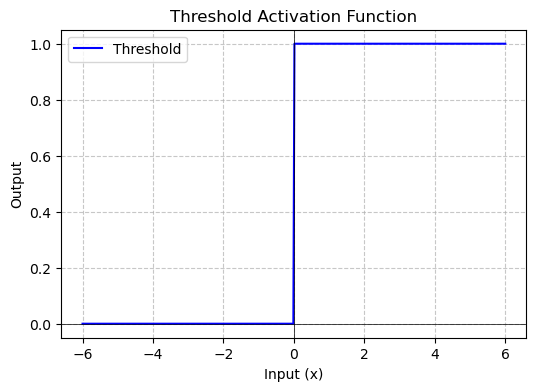

In [2]:
plot_activation_function("Threshold", lambda x: np.where(x >= 0, 1, 0))

### Sigmoid activation function

$$
f(x) = \frac {1} {1 + e^{-x}}
$$

+ $f(x) \in [0, 1]$

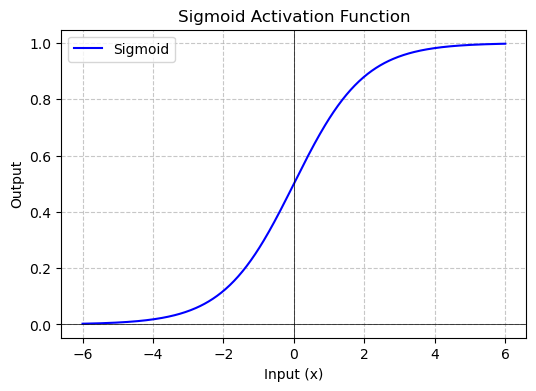

In [3]:
plot_activation_function("Sigmoid", lambda x: 1 / (1 + np.exp(-x)))

### ReLU activation function

$$
f(x) = max(0, x)
$$

+ If $x < 0$, them $f(x) = 0$
+ If $x \ge 0$, them $f(x) = x$

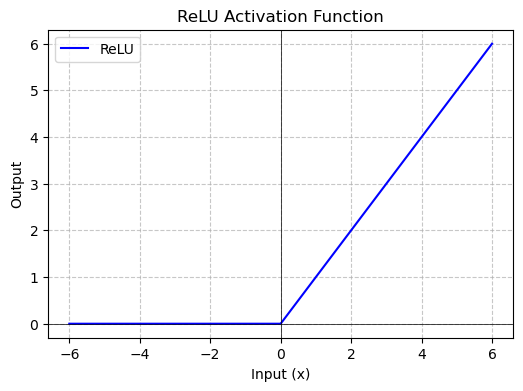

In [4]:
plot_activation_function("ReLU", lambda x: np.maximum(0, x))

### Tahn activation function

$$
f(x) = \frac {e^x - e^{-x}}{e^x + e^{-x}}
$$

+ $f(x) \in (-1, 1)$

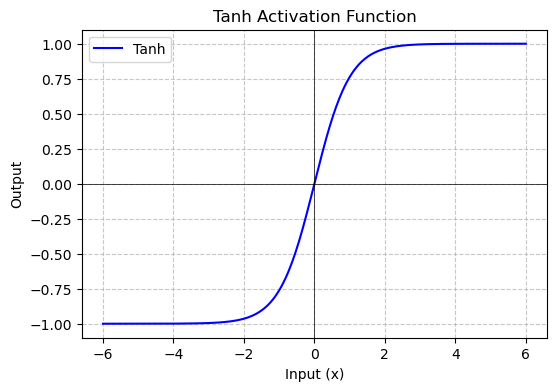

In [5]:
plot_activation_function("Tanh", lambda x: np.tanh(x))

### Leaky ReLU activation function

$$
f(x) = 
\begin{equation*}
  \left\{
    \begin{aligned}
      & \alpha x, \space \text{if} \space x < 0  \\
      & x, \space \text{if} \space x \ge 0
    \end{aligned}
  \right.
\end{equation*}
$$

+ Usually $\alpha = 0.01$

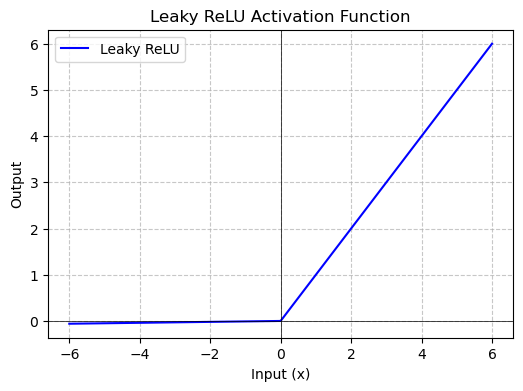

In [6]:
plot_activation_function("Leaky ReLU", lambda x: np.where(x > 0, x, x * 0.01))

## Gradient Descent

In [7]:
def cost_function(x):
    return 1/2*x**2

# gradient (derivative of cost function)
def gradient(x):
    return x

# Stochastic gradient (adding noise to simulate stochastic behavior)
def stochastic_gradient(x):
    noise = np.random.normal(0, 0.1)  # Adding Gaussian noise
    return x + noise

# Plot the gradient descent
def plot_GD(x_start, learning_rate=0.1, iterations=100, stochastic=False):
    x_values = [x_start]
    cost_values = [cost_function(x_start)]
    
    x = x_start
    for _ in range(iterations):
        if stochastic:
            x = x - learning_rate * stochastic_gradient(x)
        else:
            x = x - learning_rate * gradient(x)
        x_values.append(x)
        cost_values.append(cost_function(x))
    
    x_range = np.linspace(-5, 5, 100)
    y_range = cost_function(x_range)
    
    plt.figure(figsize=(8, 6))
    plt.plot(x_range, y_range, label="Cost Function: $f(x) = \\frac {1} {2} \\cdot x^2$", color="blue")
    plt.scatter(x_values, cost_values, color="red", label=("SGD Steps" if stochastic else "Gradient Descent Steps"), zorder=3)
    plt.plot(x_values, cost_values, linestyle="dashed", color="red")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    if stochastic:
            plt.title("Stochastic Gradient Descent")
    else:
            plt.title("Gradient Descent")
    plt.legend()
    plt.grid(True)
    plt.show()


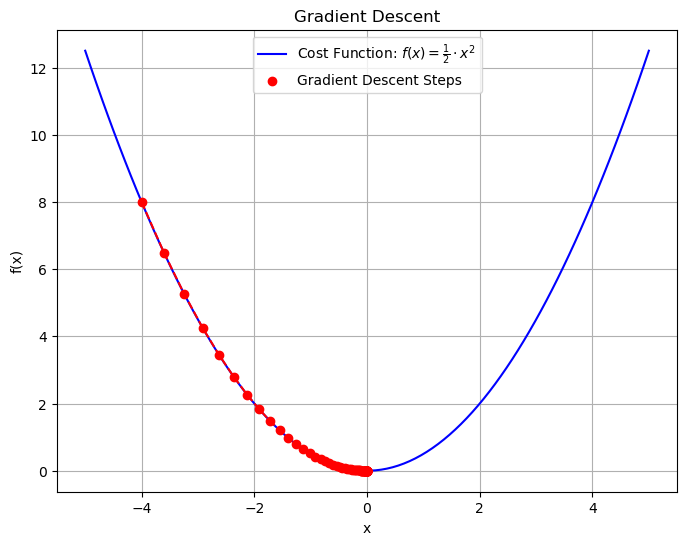

In [8]:
plot_GD(x_start=-4.0, learning_rate=0.1, iterations=100, stochastic=False)

## Stochastic Gradient Descent

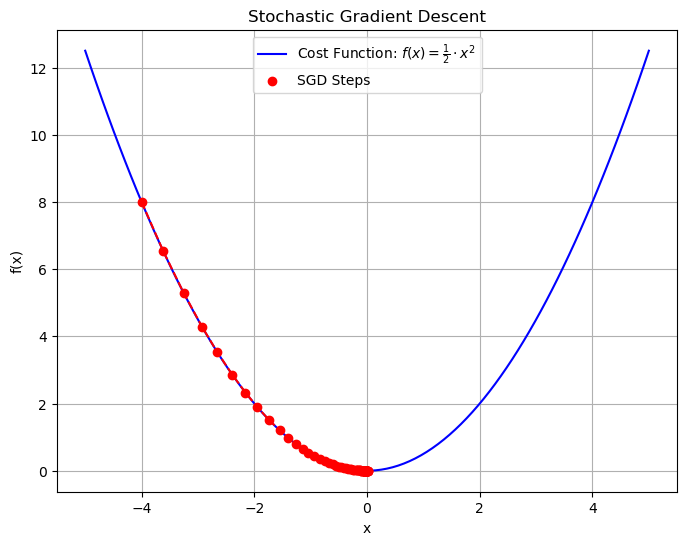

In [9]:
plot_GD(x_start=-4.0, learning_rate=0.1, iterations=100, stochastic=True)

## Backward propagation of errors

Training the ANN with stochastic gradient descent.

#### Step-by-step

##### **Step 1: Initialize Weights**  
- Set all weights to small random values close to zero.

##### **Step 2: Input One Data Sample**  
- Take one **random** training example and feed it into the network.

##### **Step 3: Forward Propagation**  
- Compute the **output** by passing the input through the network layer by layer.
- Each neuron calculates a **weighted sum** and applies an **activation function**.

##### **Step 4: Compute Error (Loss Calculation)**  
- Compare the **predicted output** with the **actual value**.
- Calculate the **error** using a loss function.

##### **Step 5: Backward Propagation (Adjust Weights)**  
- Start from the **output layer** and move backward.
- Compute how much each weight contributed to the error (**gradient calculation**).
- Update weights using **gradient descent**:
  
  $$
  W = W - \eta \cdot \frac{\partial L}{\partial W}
  $$
  
  where $\eta$ is the learning rate.

##### **Step 6: Repeat for Each Training Sample**  
- Unlike batch gradient descent, which updates weights **after seeing all data**, **SGD updates weights after each individual training example**.
- This allows faster learning but introduces **more noise**.

##### **Step 7: Repeat Until Convergence (Multiple Epochs)**  
- One full pass through the dataset is called an **epoch**.
- Run multiple epochs until the **error is minimized**.

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

%matplotlib inline

2025-02-13 21:31:28.293904: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [11]:
tf.__version__

'2.17.0'

## Dataset

In [12]:
%cat "../00_data/Churn_Modelling.csv"|head

RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,15634602,Hargrave,619,France,Female,42,2,0,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.8,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.1,0
6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
7,15592531,Bartlett,822,France,Male,50,7,0,2,1,1,10062.8,0
8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.5,0
cat: stdout: Broken pipe


In [13]:
%cat "../00_data/Churn_Modelling.csv"|tail

9991,15798964,Nkemakonam,714,Germany,Male,33,3,35016.6,1,1,0,53667.08,0
9992,15769959,Ajuluchukwu,597,France,Female,53,4,88381.21,1,1,0,69384.71,1
9993,15657105,Chukwualuka,726,Spain,Male,36,2,0,1,1,0,195192.4,0
9994,15569266,Rahman,644,France,Male,28,7,155060.41,1,1,0,29179.52,0
9995,15719294,Wood,800,France,Female,29,2,0,2,0,0,167773.55,0
9996,15606229,Obijiaku,771,France,Male,39,5,0,2,1,0,96270.64,0
9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9998,15584532,Liu,709,France,Female,36,7,0,1,0,1,42085.58,1
9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [14]:
# data loading 
data = pd.read_csv("../00_data/Churn_Modelling.csv")

data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [15]:
data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [16]:
data.shape

(10000, 14)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [18]:
data.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## Data Preprocessing

In [19]:
X = data.iloc[:, 3:-1].values # except RowNumber, CustomerId, and Exited as target variable
y = data.iloc[:, -1].values # target variable

### Features encoding

In [20]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
X[:, 2] = label_encoder.fit_transform(X[:, 2])
print(X[:5, :])
print("...")
print(X[-5:, :])

[[619 'France' 0 42 2 0.0 1 1 1 101348.88]
 [608 'Spain' 0 41 1 83807.86 1 0 1 112542.58]
 [502 'France' 0 42 8 159660.8 3 1 0 113931.57]
 [699 'France' 0 39 1 0.0 2 0 0 93826.63]
 [850 'Spain' 0 43 2 125510.82 1 1 1 79084.1]]
...
[[771 'France' 1 39 5 0.0 2 1 0 96270.64]
 [516 'France' 1 35 10 57369.61 1 1 1 101699.77]
 [709 'France' 0 36 7 0.0 1 0 1 42085.58]
 [772 'Germany' 1 42 3 75075.31 2 1 0 92888.52]
 [792 'France' 0 28 4 130142.79 1 1 0 38190.78]]


In [21]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[("encoder", OneHotEncoder(), [1])], remainder="passthrough")
print(sorted(np.unique(X[:, 1])))

X = np.array(ct.fit_transform(X))

print(X[:5, :])
print("...")
print(X[-5:, :])

['France', 'Germany', 'Spain']
[[1.0 0.0 0.0 619 0 42 2 0.0 1 1 1 101348.88]
 [0.0 0.0 1.0 608 0 41 1 83807.86 1 0 1 112542.58]
 [1.0 0.0 0.0 502 0 42 8 159660.8 3 1 0 113931.57]
 [1.0 0.0 0.0 699 0 39 1 0.0 2 0 0 93826.63]
 [0.0 0.0 1.0 850 0 43 2 125510.82 1 1 1 79084.1]]
...
[[1.0 0.0 0.0 771 1 39 5 0.0 2 1 0 96270.64]
 [1.0 0.0 0.0 516 1 35 10 57369.61 1 1 1 101699.77]
 [1.0 0.0 0.0 709 0 36 7 0.0 1 0 1 42085.58]
 [0.0 1.0 0.0 772 1 42 3 75075.31 2 1 0 92888.52]
 [1.0 0.0 0.0 792 0 28 4 130142.79 1 1 0 38190.78]]


## Splitting dataset into the training and test set

In [22]:
random_forest = 42

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_forest)

## Feature Scaling

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [25]:
X_train[:5, :]

array([[ 1.00150113, -0.57946723, -0.57638802,  0.35649971,  0.91324755,
        -0.6557859 ,  0.34567966, -1.21847056,  0.80843615,  0.64920267,
         0.97481699,  1.36766974],
       [-0.99850112,  1.72572313, -0.57638802, -0.20389777,  0.91324755,
         0.29493847, -0.3483691 ,  0.69683765,  0.80843615,  0.64920267,
         0.97481699,  1.6612541 ],
       [-0.99850112, -0.57946723,  1.73494238, -0.96147213,  0.91324755,
        -1.41636539, -0.69539349,  0.61862909, -0.91668767,  0.64920267,
        -1.02583358, -0.25280688],
       [ 1.00150113, -0.57946723, -0.57638802, -0.94071667, -1.09499335,
        -1.13114808,  1.38675281,  0.95321202, -0.91668767,  0.64920267,
        -1.02583358,  0.91539272],
       [ 1.00150113, -0.57946723, -0.57638802, -1.39733684,  0.91324755,
         1.62595257,  1.38675281,  1.05744869, -0.91668767, -1.54035103,
        -1.02583358, -1.05960019]])

In [26]:
X_test[:5, :]

array([[-1.02020406,  1.73668197, -0.56349184, -0.51250172,  0.90911166,
        -0.67729931, -0.69844549,  0.30084641,  0.80510537, -1.57810057,
        -1.0502616 , -0.99096946],
       [ 0.98019606, -0.57581067, -0.56349184, -0.2360466 ,  0.90911166,
         0.38429835, -1.38035469, -1.25599716,  0.80510537,  0.63367318,
         0.95214374,  0.8293793 ],
       [-1.02020406, -0.57581067,  1.77464858, -0.46130633, -1.09997489,
         0.48080723, -0.3574909 , -1.25599716,  0.80510537,  0.63367318,
        -1.0502616 , -0.69904548],
       [-1.02020406,  1.73668197, -0.56349184, -1.43401879,  0.90911166,
         1.92844041,  1.0063275 ,  0.66213917,  0.80510537,  0.63367318,
         0.95214374,  1.25231536],
       [-1.02020406, -0.57581067,  1.77464858, -0.88110855, -1.09997489,
        -1.1598437 ,  0.6653729 ,  0.75621521, -0.89163935,  0.63367318,
         0.95214374,  0.27749237]])

## Building the ANN

In [27]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

# Initializing the ANN
ann = Sequential() 
# Add input layer with 12 neurones(features)
ann.add(Input(shape=(12,)))
# Add first hidden layer with 6 neurones
ann.add(Dense(6, activation="relu")) 
# Add second hidden layer
ann.add(Dense(6, activation="relu")) 
# Output layer (Binary Classification)
ann.add(Dense(1, activation="sigmoid"))

In [28]:
# Compile the ANN
ann.compile(optimizer="adam",
            loss="binary_crossentropy",  # loss function
            metrics=["accuracy"])  # metrics

In [29]:
ann.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 6)              │            78 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │            42 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 127 (508.00 B)

 Trainable params: 127 (508.00 B)

 Non-trainable params: 0 (0.00 B)

## Training the model

In [30]:
history = ann.fit(X_train, y_train, 
                    validation_data=(X_test, y_test),
                    epochs=50, batch_size=32, verbose=False)

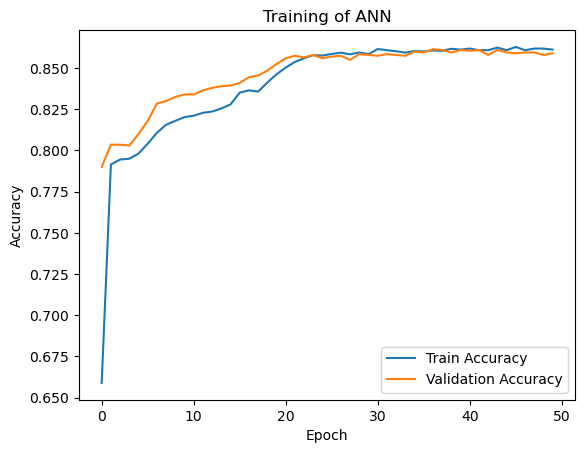

In [31]:
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training of ANN")
plt.show()

## Evaluation the model

In [32]:
loss, accuracy = ann.evaluate(X_test, y_test, verbose=False)
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 0.8590


## Prediction on the test set

In [33]:
predictions = ann.predict(X_test, verbose=False)
predictions = (predictions > 0.5).astype(int)

In [34]:
predictions

array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [0]])

In [35]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predictions)
cm

array([[1534,   73],
       [ 209,  184]])

## Single prediction

In [36]:
joey_tribbiani = [[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]]
(ann.predict(scaler.transform(joey_tribbiani), verbose=False) > 0.5).astype(int)

array([[0]])